In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [44]:
site = "F"

In [43]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 26 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ts                             1106805 non-null  object 
 1   instanceID                     1106805 non-null  object 
 2   AoARel                         1065846 non-null  float64
 3   bladePitch                     1065870 non-null  float64
 4   bladePitchMax                  1066118 non-null  float64
 5   bladePitchMin                  1065870 non-null  float64
 6   bladePitchSetPoint             0 non-null        float64
 7   bladePitchStd                  1084902 non-null  float64
 8   cP                             1065798 non-null  float64
 9   generatorTorque                1065799 non-null  float64
 10  rotorTorque                    1027641 non-null  float64
 11  TI                             1065846 non-null  float64
 12  TSR           

In [22]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ts          1106805 non-null  object
 1   instanceID  1106805 non-null  object
 2   value       1106805 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 25.3+ MB


In [46]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

21
['F_WTG01' 'F_WTG02' 'F_WTG03' 'F_WTG04' 'F_WTG05' 'F_WTG06' 'F_WTG07'
 'F_WTG08' 'F_WTG09' 'F_WTG10' 'F_WTG14' 'F_WTG15' 'F_WTG16' 'F_WTG17'
 'F_WTG18' 'F_WTG19' 'F_WTG20' 'F_WTG21' 'F_WTG22' 'F_WTG23' 'F_WTG24']


**Comment:** data size: 1106805 x 26; flag size: 1106805 x 3. There are 21 turbines. 366 x 21 x 24 x 6 + 21 = 1106805. No missing rows.

In [47]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [48]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [49]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [50]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [51]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
258497,2020-03-26 11:30:00,3,26,11,F_WTG09,2.113356,0.769695,36.420506,9.988314,0.000000,0
860845,2020-10-11 16:00:00,10,11,16,F_WTG17,6.348087,0.493120,7.768010,9.494176,312.875214,1
731106,2020-08-29 18:20:00,8,29,18,F_WTG16,3.748167,0.638678,17.039743,10.000000,60.486668,1
1087165,2020-12-25 12:10:00,12,25,12,F_WTG20,8.319500,0.817507,9.826396,4.001667,1022.303345,1
840919,2020-10-05 01:50:00,10,5,1,F_WTG20,1.808347,0.313248,17.322340,11.000000,0.000000,0


### Plot time series

In [52]:
data_01 = data[data['instanceID'] == site + '_WTG01']

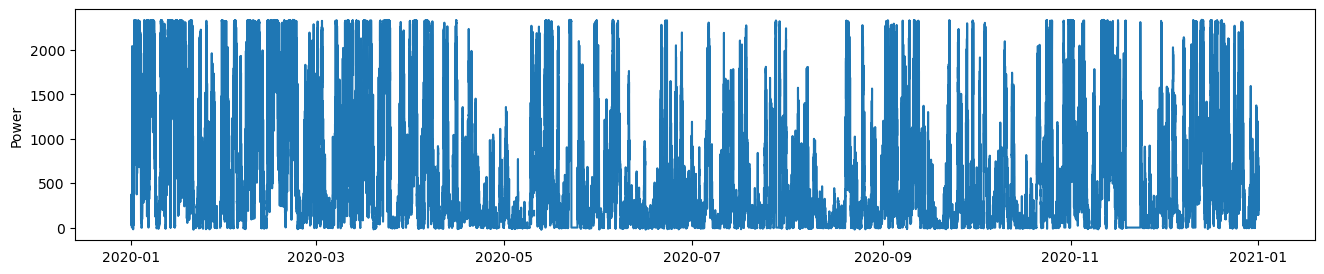

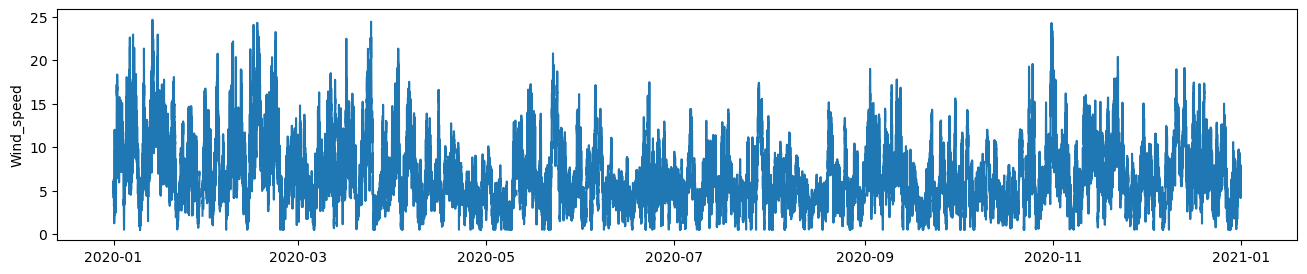

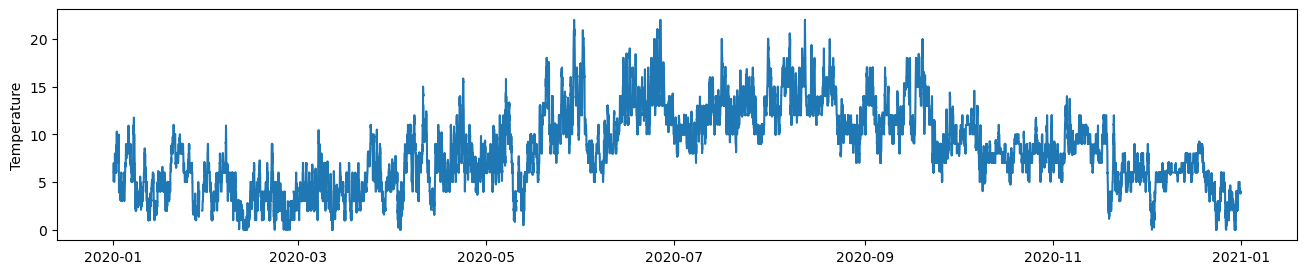

In [53]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Temperature')
plt.show()

### Full performance data

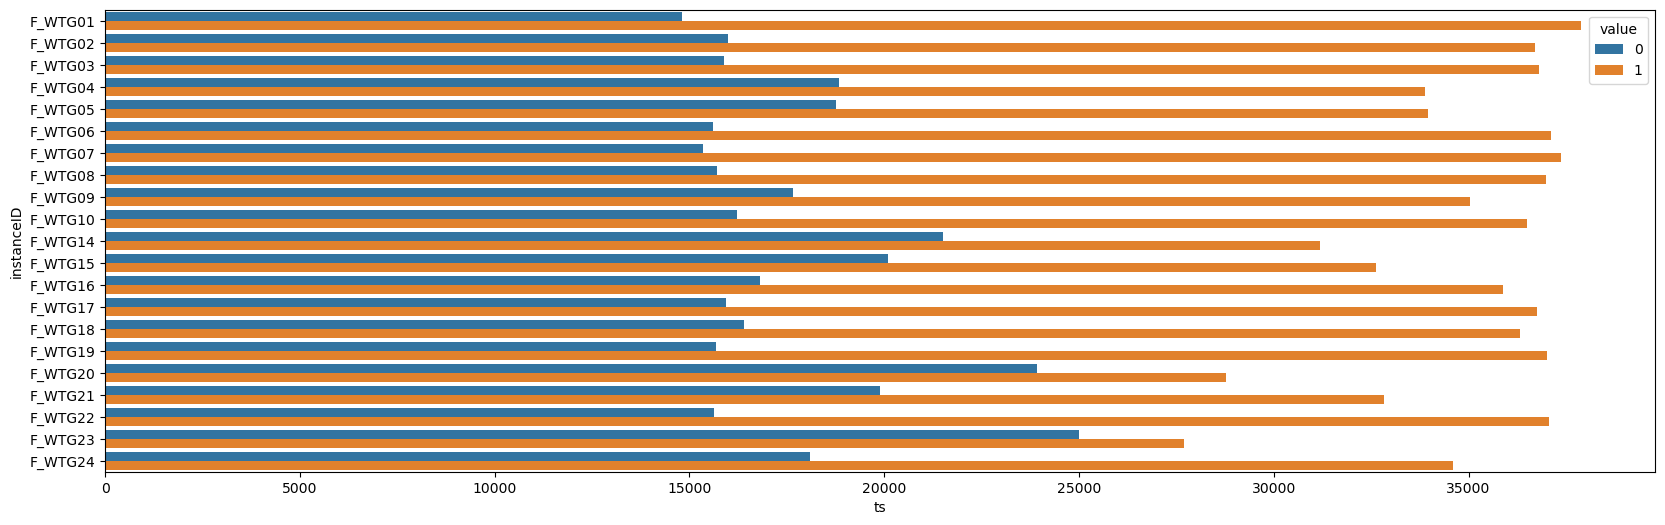

In [54]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.barplot(x="ts", y="instanceID", hue = "value", data=bar, orient = "h")

plt.show()

In [55]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [56]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,733005.000000,733005.000000,733005.000000,733005.000000,733005.000000,733005.000000,733005.000000,733005.000000
mean,6.358981,15.536898,11.693579,7.752437,0.974361,13.295500,8.530025,852.214213
std,3.542573,8.705519,6.860669,3.634701,0.457830,4.513869,4.242289,785.541697
min,1.000000,1.000000,0.000000,1.428548,0.000000,0.000000,-19.449081,2.305509
25%,3.000000,8.000000,6.000000,4.883833,0.632979,10.114949,5.543333,178.232986
50%,6.000000,15.000000,12.000000,6.965943,0.897447,12.850271,8.000000,560.521667
75%,10.000000,23.000000,18.000000,9.919667,1.227870,15.975624,11.118333,1448.358887
max,12.000000,31.000000,23.000000,25.006832,6.004419,68.314651,27.113523,2439.857178


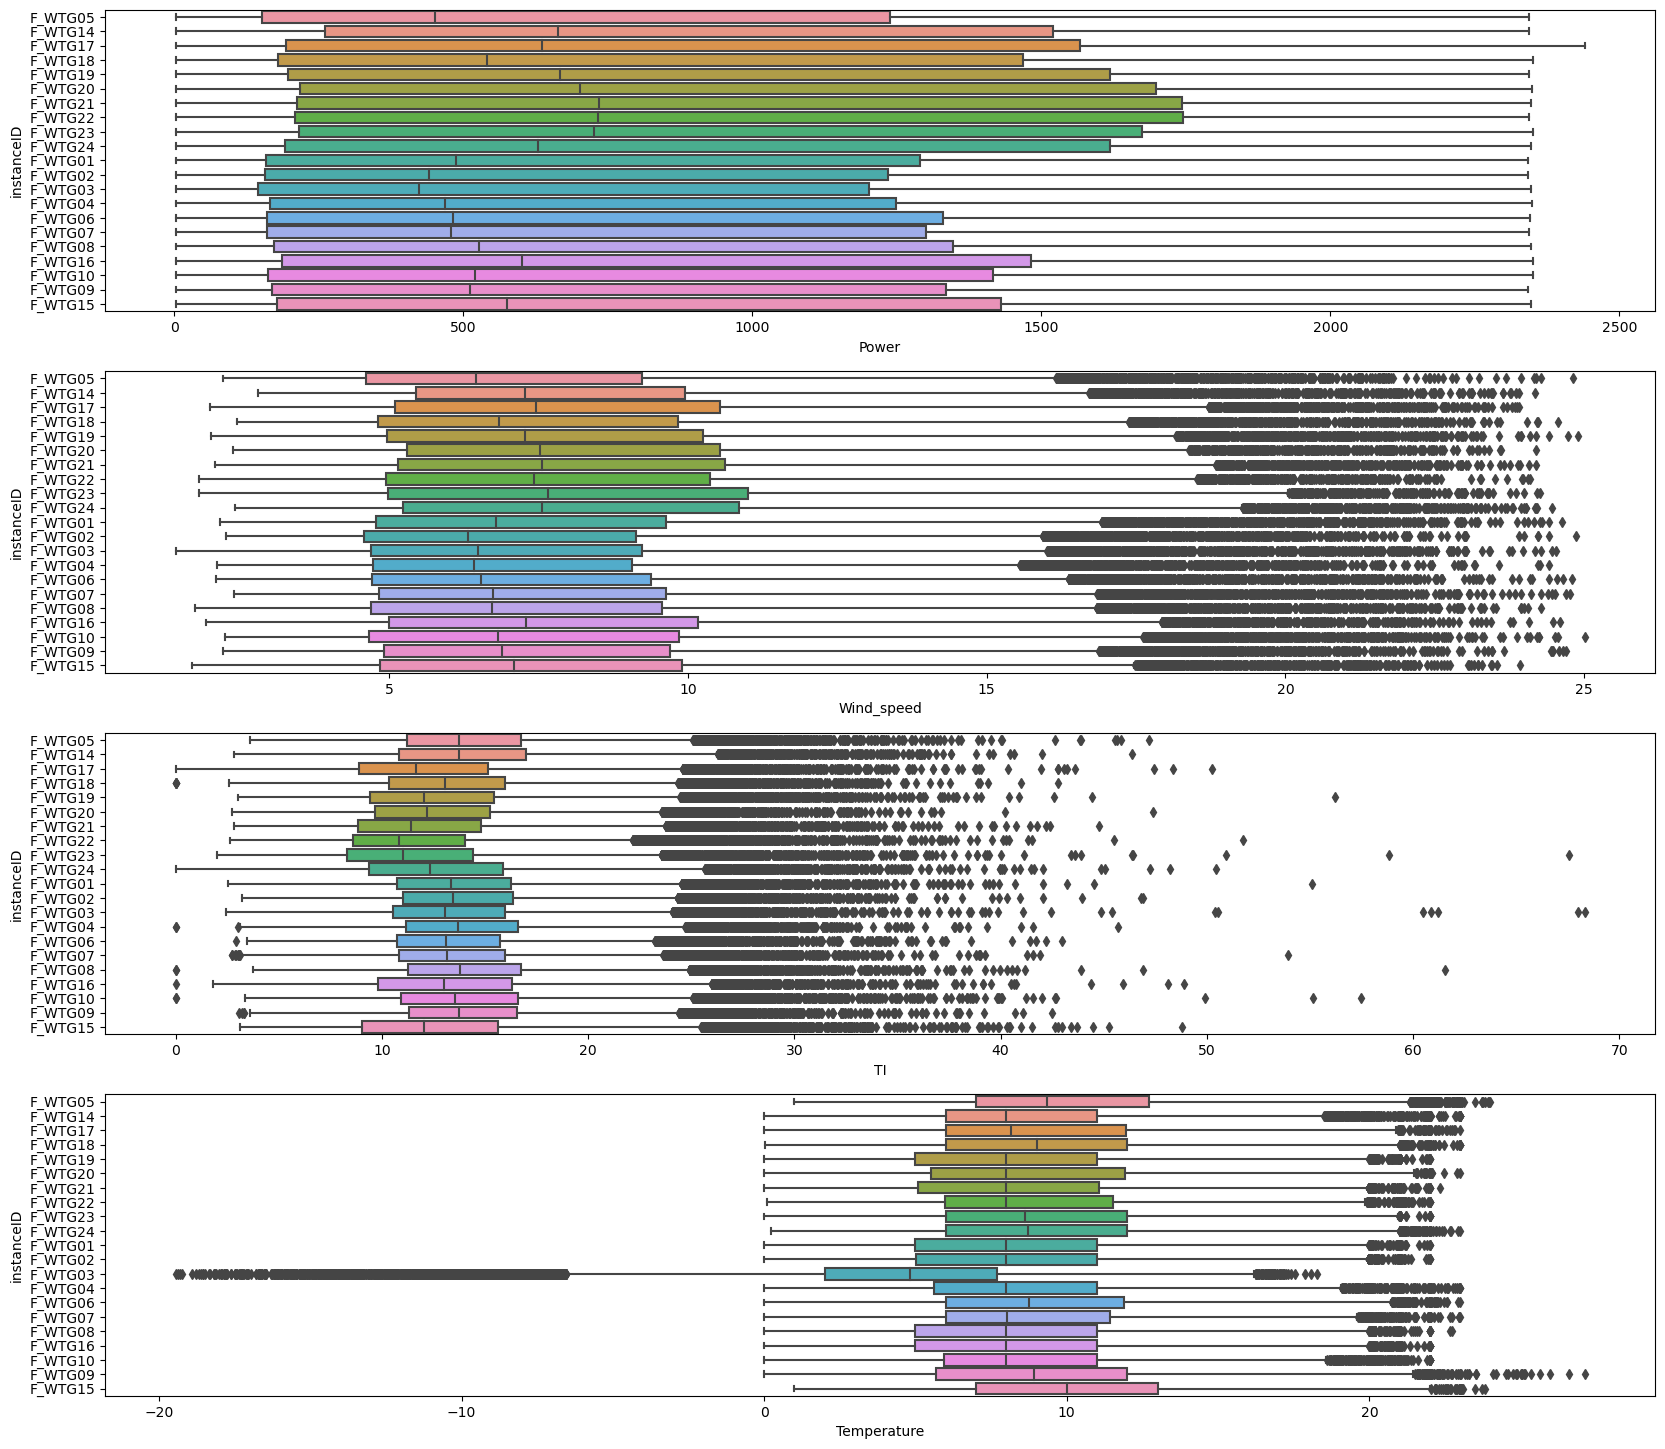

In [57]:
# Make boxplot
fig, ax = plt.subplots(4, figsize = (20,18))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

In [58]:
data_clean[(data_clean['Temperature'] < -5) ]


,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
631388,2020-07-27 19:00:00,7,27,19,F_WTG03,7.271333,0.697200,9.588338,-5.120000,612.979980
631409,2020-07-27 19:10:00,7,27,19,F_WTG03,6.507012,0.770278,11.837661,-5.006678,424.637726
631430,2020-07-27 19:20:00,7,27,19,F_WTG03,6.337937,0.744821,11.751790,-5.492512,419.282867
631451,2020-07-27 19:30:00,7,27,19,F_WTG03,7.008167,0.848833,12.112055,-5.850000,555.313354
710453,2020-08-22 22:30:00,8,22,22,F_WTG03,5.483527,1.110005,20.242537,-5.311148,246.429291
...,...,...,...,...,...,...,...,...,...,...
814004,2020-09-26 04:20:00,9,26,4,F_WTG03,8.832945,0.702932,7.958071,-14.409318,1057.850220
814025,2020-09-26 04:30:00,9,26,4,F_WTG03,9.623539,0.811434,8.431763,-14.185309,1304.686157
814046,2020-09-26 04:40:00,9,26,4,F_WTG03,8.861564,0.640315,7.225756,-14.134775,1035.923462
814067,2020-09-26 04:50:00,9,26,4,F_WTG03,8.003500,0.761580,9.515587,-17.934999,821.296692


In [59]:
# drop rows with extreme values
data_clean = data_clean[(data_clean['Temperature'] >= -5)]

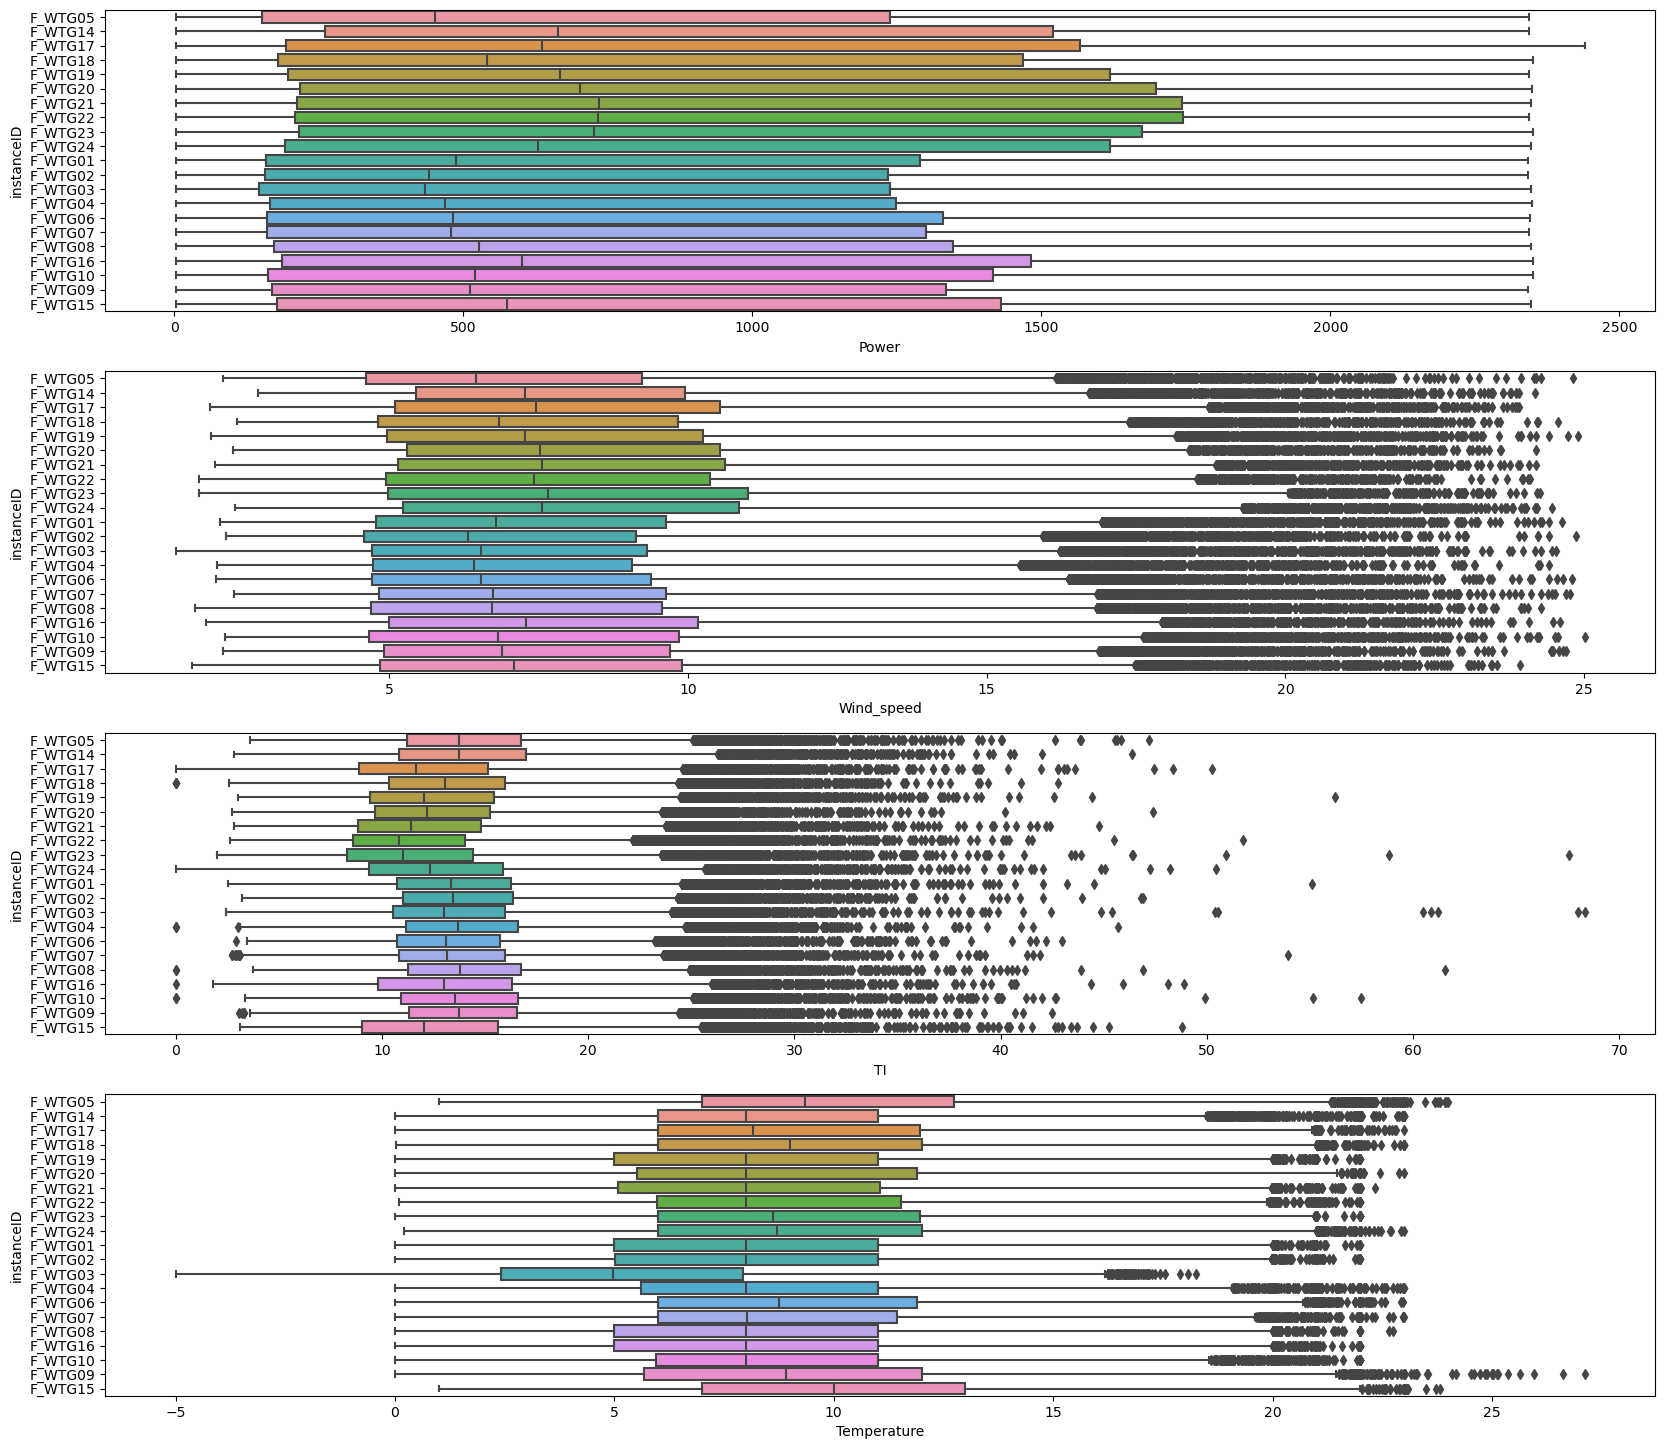

In [60]:
# Make boxplot after removing extreme values 
fig, ax = plt.subplots(4, figsize = (20,18))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

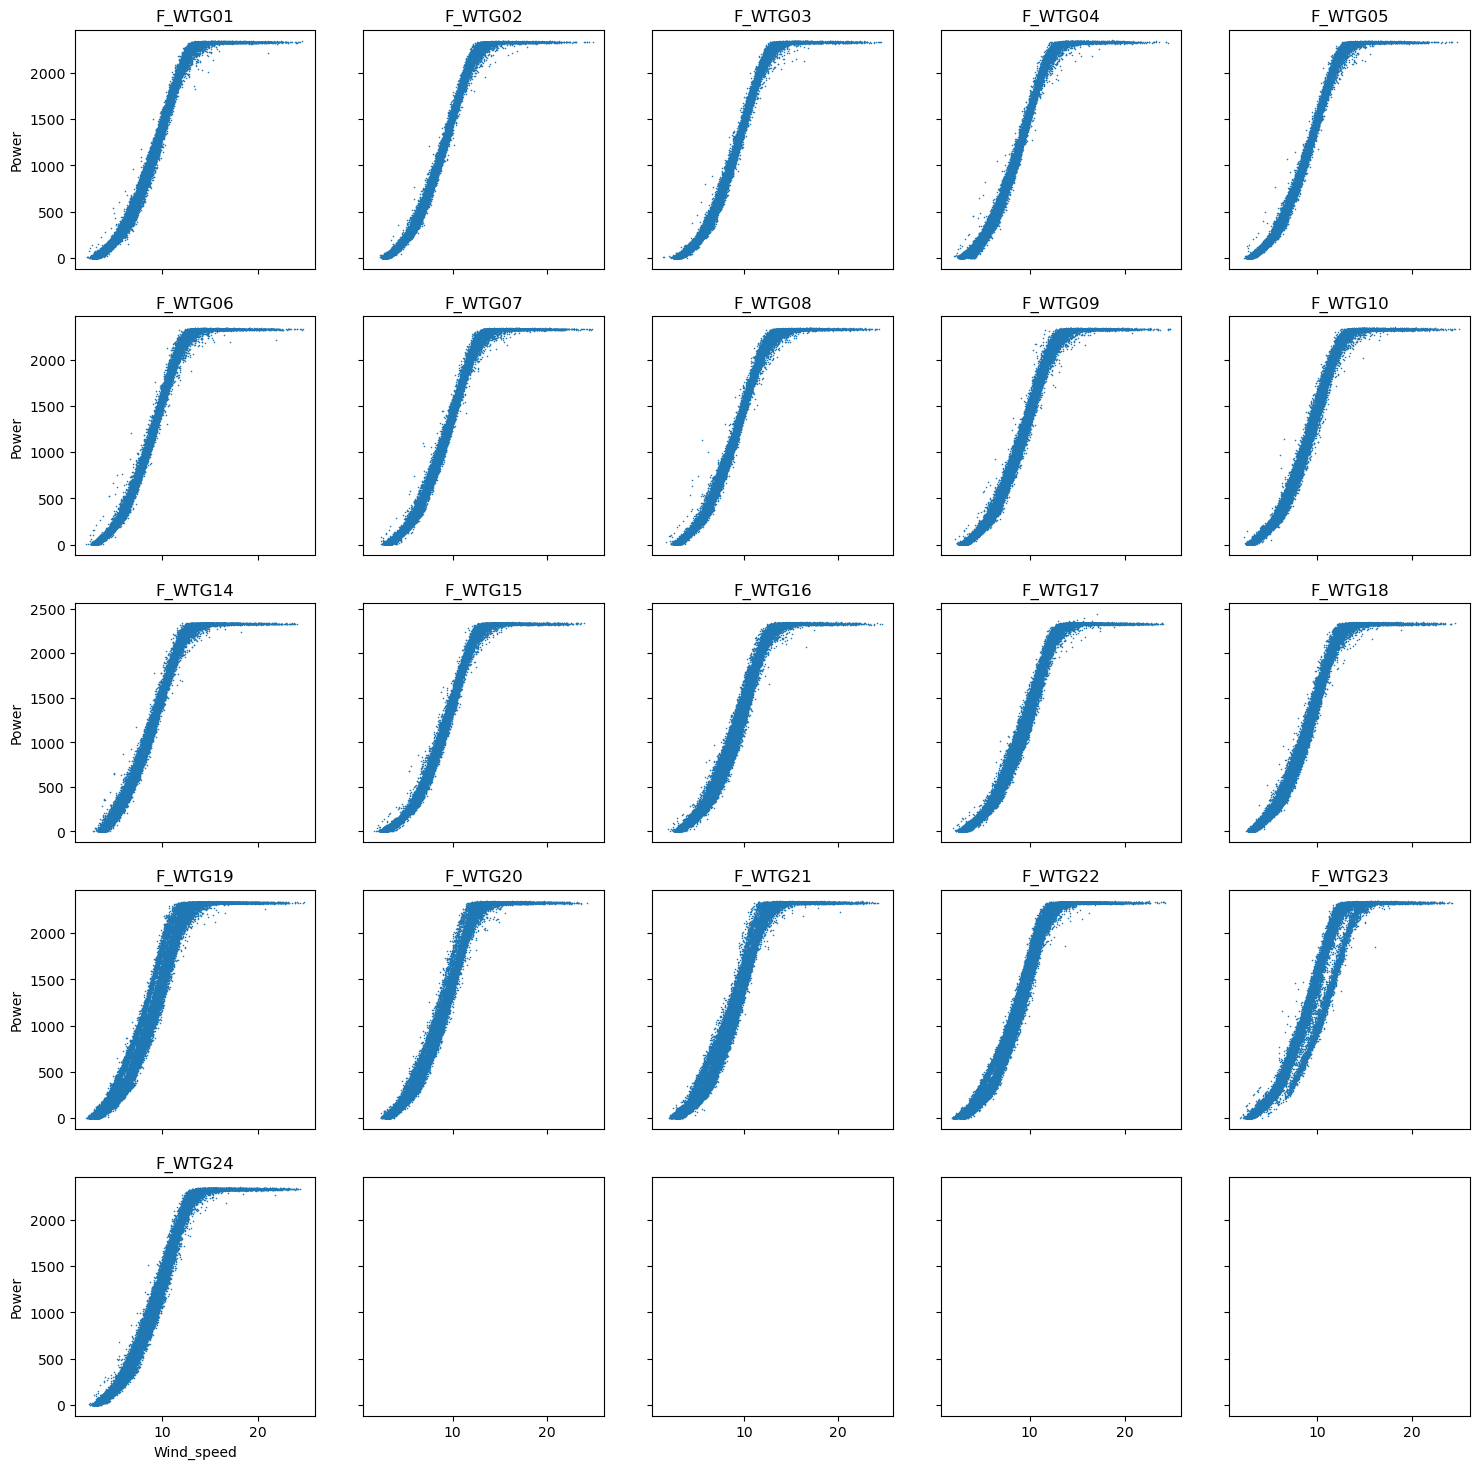

In [61]:
# Plot power curve for each turbine
fig, ax = plt.subplots(5,5, figsize=(18,18), sharex='col', sharey='row');

i = 0
for r in range (5):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1
            if i >= turbine_count:
                break
plt.show()

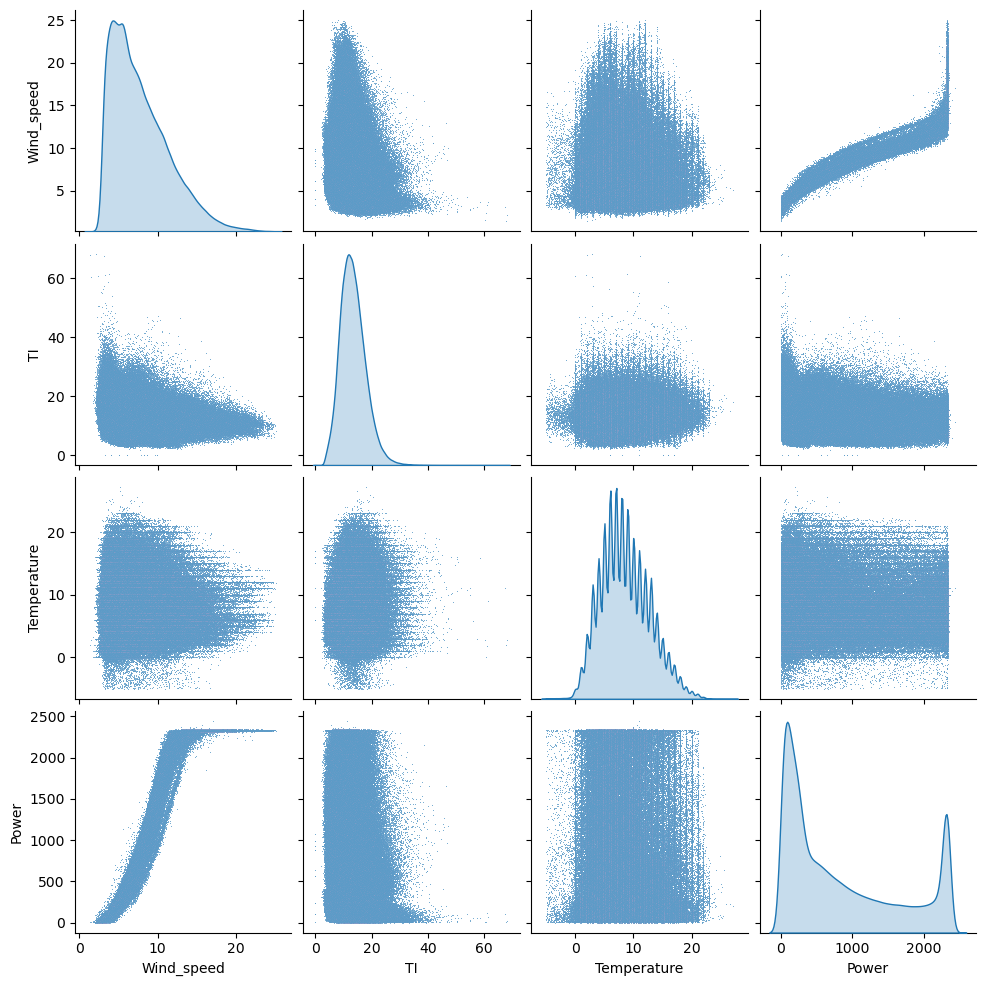

In [62]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

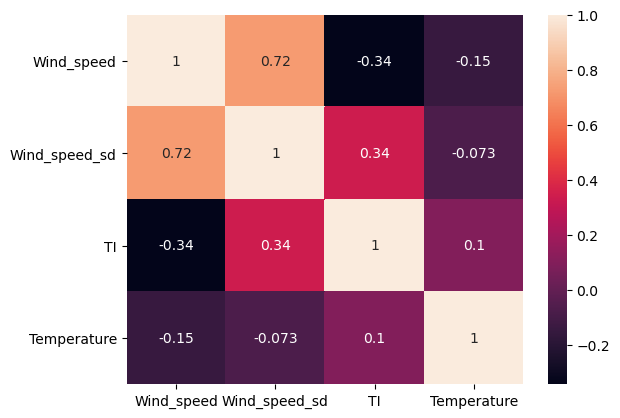

In [63]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

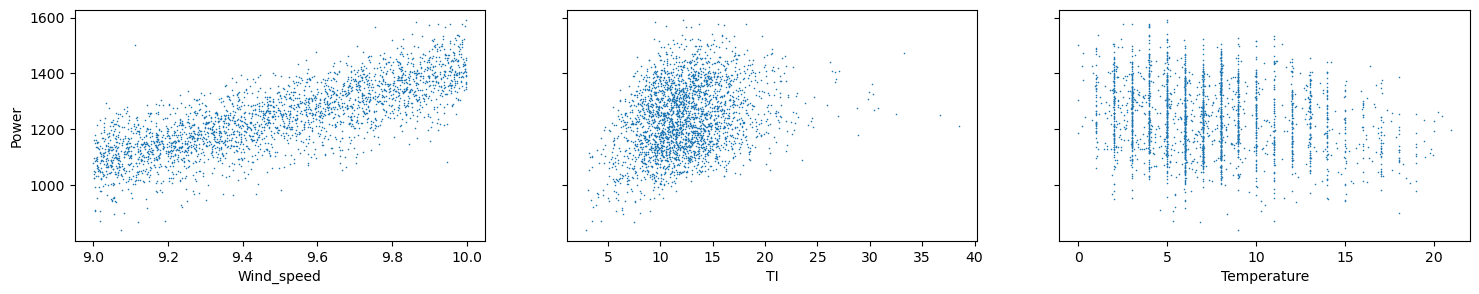

In [64]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTG01") & (data_clean['Wind_speed'] >= 9) 
                           & (data_clean['Wind_speed'] <= 10)] 

features = ["Wind_speed", "TI", "Temperature"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

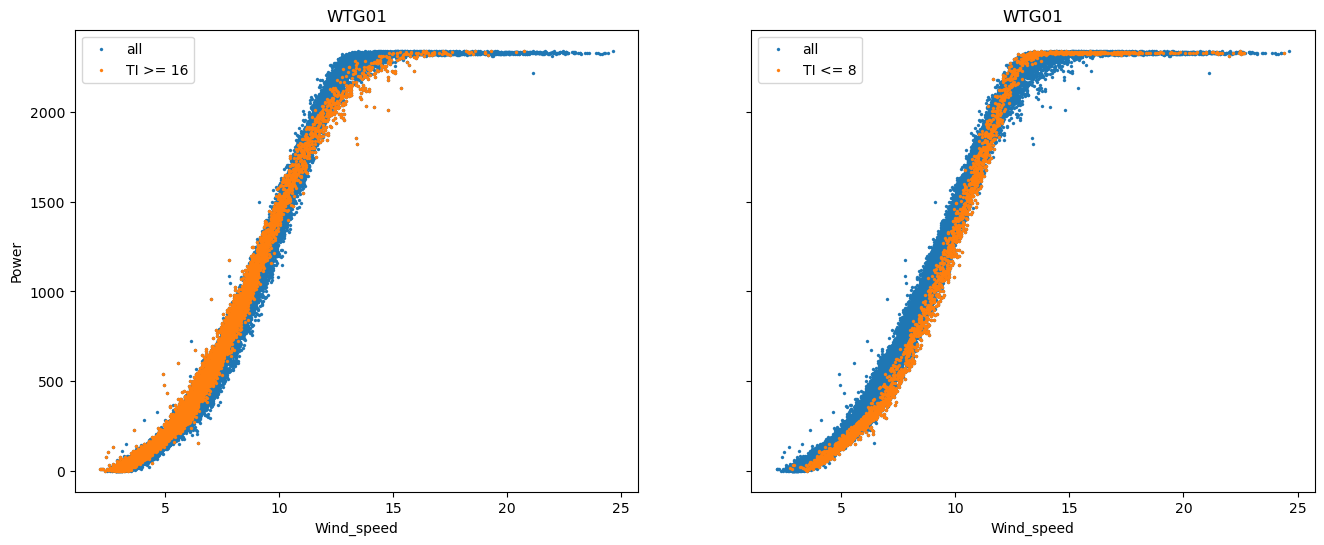

In [65]:
# Plot power curve of difference TI range
WTG01 = data_clean[(data_clean['instanceID'] == site + '_WTG01')]
WTG01_a = WTG01[(WTG01['TI'] >= 16)] 
WTG01_b = WTG01[(WTG01['TI'] <= 8)] 

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey='row')

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[0], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_a['Wind_speed'], y = WTG01_a['Power'], ax = ax[0], s = 5 , label = 'TI >= 16', edgecolor = None)
ax[0].set_xlabel('Wind_speed') 
ax[0].set_ylabel("Power") 
ax[0].set_title("WTG01") 

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[1], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_b['Wind_speed'], y = WTG01_b['Power'], ax = ax[1], s = 5, label = 'TI <= 8', edgecolor = None)
ax[1].set_xlabel('Wind_speed') 
ax[1].set_ylabel("Power") 
ax[1].set_title("WTG01") 

plt.show()

### Export clean data

In [66]:
data_clean.to_csv("")